In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
diabetes = pd.read_csv("diabetes.csv", header=None, names=col_names)

#### pregnant : Number of times pregnant
#### glucose :  plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### skin : skin fold thickness (mm)
#### pedigree : Diabetes pedigree function
#### OutcomeClass variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
diabetes = diabetes.drop(0,0)
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes[feature_cols] 
y = diabetes.label 

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 7:3

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier() #default : Gini
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('Accuracy:%.2f'%metrics.accuracy_score(y_test, y_pred))

Accuracy:0.65


In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

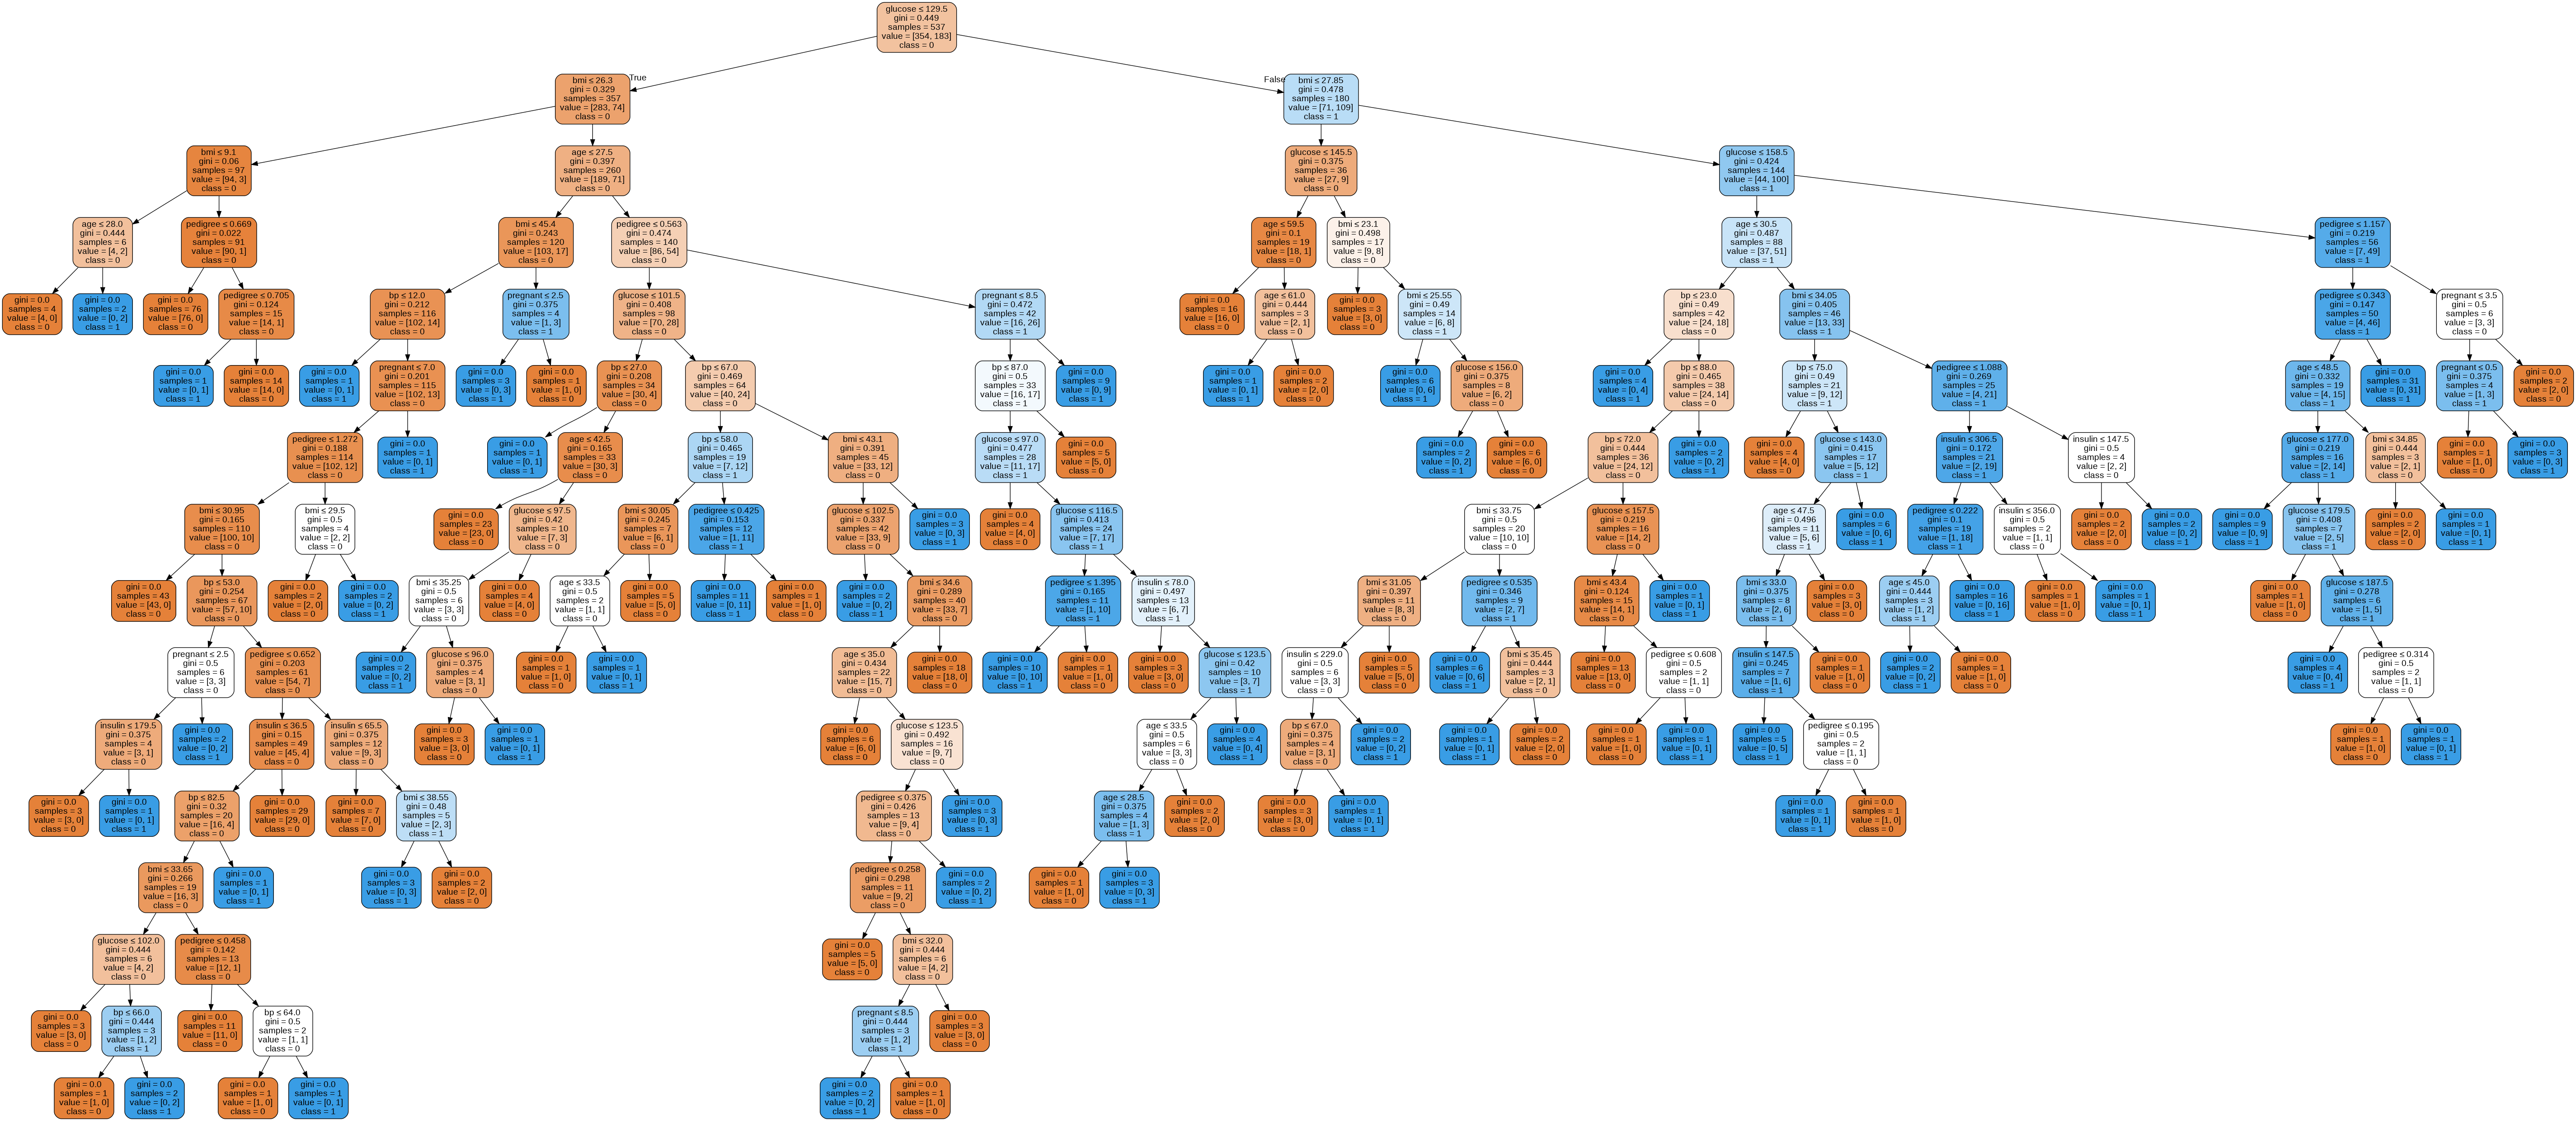

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:%.2f"%metrics.accuracy_score(y_test, y_pred))

Accuracy:0.77


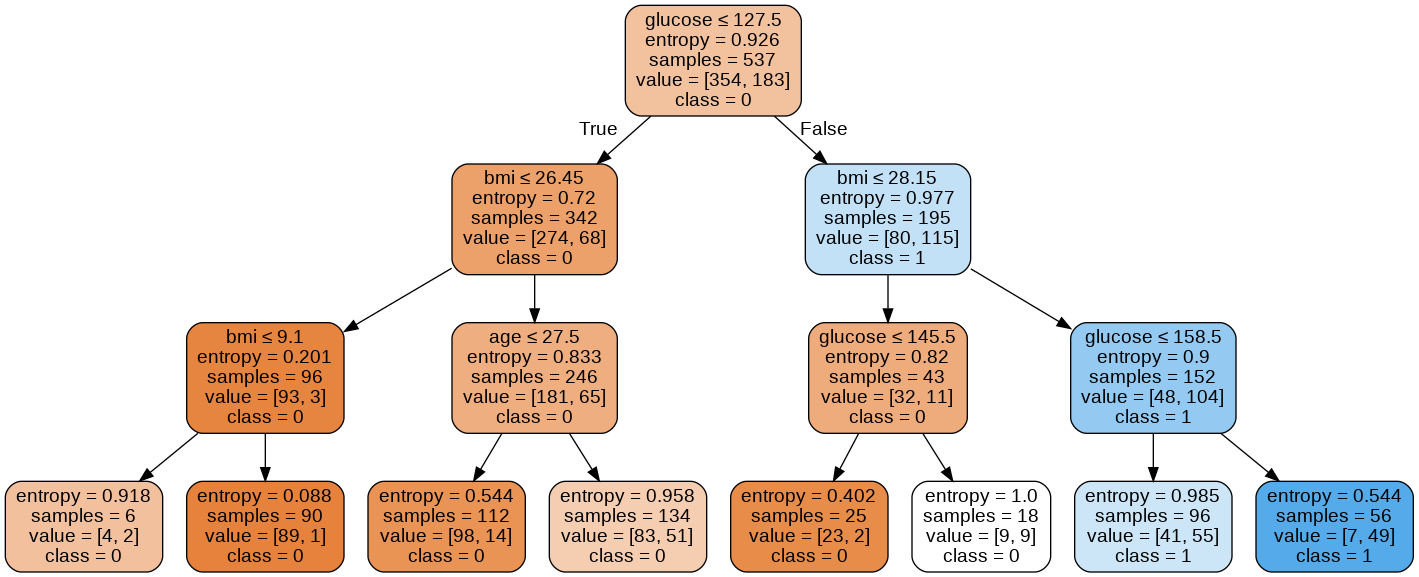

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())